<a href="https://colab.research.google.com/github/a20204457/GrupoHAdultDataset/blob/master/Adult_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## utilizar el notebook de un archivo en github, actualizarlo en colab y que se cree una versión en github
## por cada integrante:
## 1.función de preprocesamiento con las variables que le tocó
## 2.feature selection
## 3.dimensional reduction
## 4.entrenar el modelo
## 5.métrica AUC y la curva ROC
## 6.realizar el feature importance
## 7.conclusiones

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Lectura del dataset
file_name = "/adult.data.csv"

#El método "read_csv" nos permite leer un excel
dataset = pd.read_csv(file_name, delimiter=', ')
#dataframe = read_csv(filename, header=None, na_values='?')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


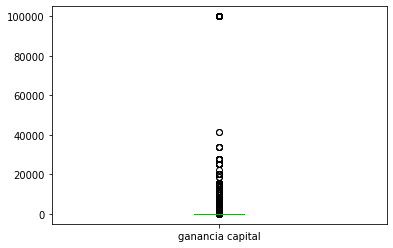

In [ ]:
dataset['ganancia capital'].plot(kind='box')

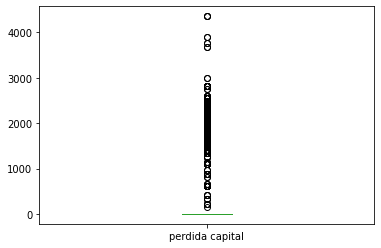

In [ ]:
dataset[['perdida capital']].plot(kind='box')

In [ ]:
dataset[['ganancia capital','perdida capital']]

,ganancia capital,perdida capital
0,2174,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32556,0,0
32557,0,0
32558,0,0
32559,0,0


In [ ]:
dataset.head()

,edad,clase de trabajo,fnlwgt,educacion,educacion-num,estado marital,ocupacion,relacion,raza,sexo,ganancia capital,perdida capital,horas por semana,pais,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset.describe()

,edad,fnlwgt,educacion-num,ganancia capital,perdida capital,horas por semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
null_columns=dataset.columns[dataset.isnull().any()]
null_columns

Index([], dtype='object')

In [ ]:
col_v = ['edad','relacion','ocupacion','sexo','educacion', 'ganancia capital', 'perdida capital', 'horas por semana', 'pais', 'target']
dataset_v = dataset[col_v]
dataset_v.describe()

,edad,ganancia capital,perdida capital,horas por semana
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Male      21790
Female    10771
Name: sexo, dtype: int64


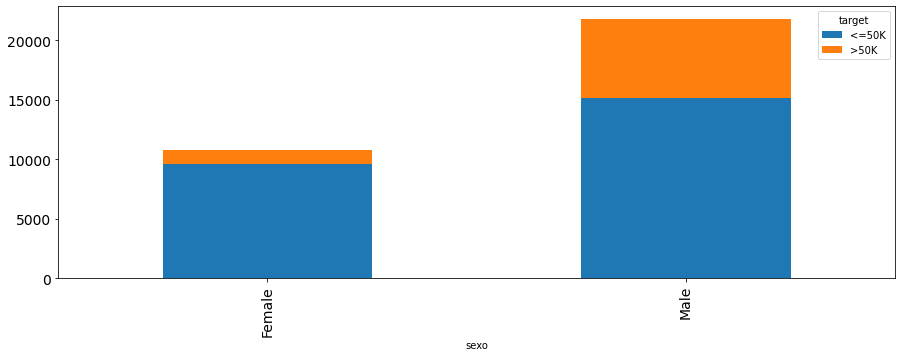

In [ ]:
print(dataset_v.sexo.value_counts())
draw_data = pd.crosstab(dataset_v['sexo'], dataset_v['target'])
figure = draw_data.plot(fontsize = 14, kind='bar', stacked=True, grid=False, figsize=(15, 5),subplots=False,legend=True);
plt.savefig('sexo.jpg')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: edad, Length: 73, dtype: int64


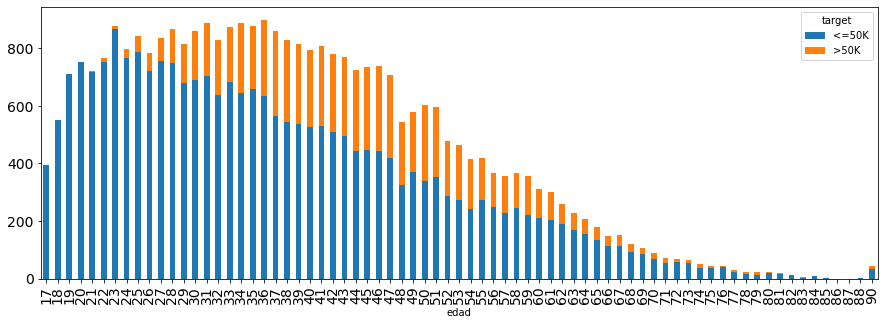

In [ ]:
print(dataset_v.edad.value_counts())
draw_data = pd.crosstab(dataset_v['edad'], dataset_v['target'])
figure = draw_data.plot(fontsize = 14, kind='bar', stacked=True, grid=False, figsize=(15, 5),subplots=False,legend=True);
plt.savefig('edad.jpg')

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relacion, dtype: int64


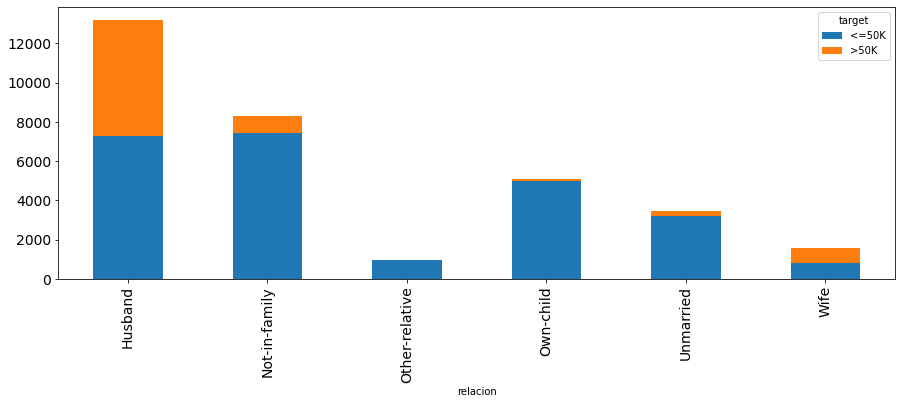

In [ ]:
print(dataset_v.relacion.value_counts())
draw_data = pd.crosstab(dataset_v['relacion'], dataset_v['target'])
figure = draw_data.plot(fontsize = 14, kind='bar', stacked=True, grid=False, figsize=(15, 5),subplots=False,legend=True);
plt.savefig('relacion.jpg')

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: ocupacion, dtype: int64


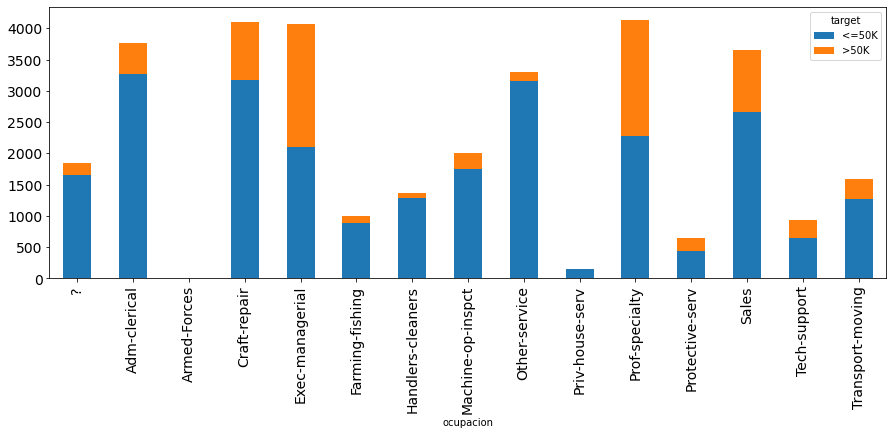

In [ ]:
print(dataset_v.ocupacion.value_counts())
draw_data = pd.crosstab(dataset_v['ocupacion'], dataset_v['target'])
figure = draw_data.plot(fontsize = 14, kind='bar', stacked=True, grid=False, figsize=(15, 5),subplots=False,legend=True);
plt.savefig('ocupacion.jpg')

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: educacion, dtype: int64


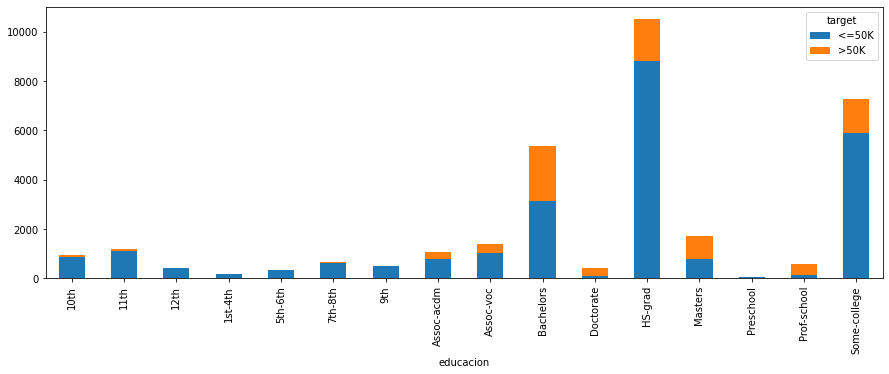

In [ ]:
print(dataset_v.educacion.value_counts())
draw_data = pd.crosstab(dataset_v['educacion'], dataset_v['target'])
figure = draw_data.plot(kind='bar', stacked=True, grid=False, figsize=(15, 5),subplots=False,legend=True);
plt.savefig('educacion.jpg')

<=50K    24720
>50K      7841
Name: target, dtype: int64


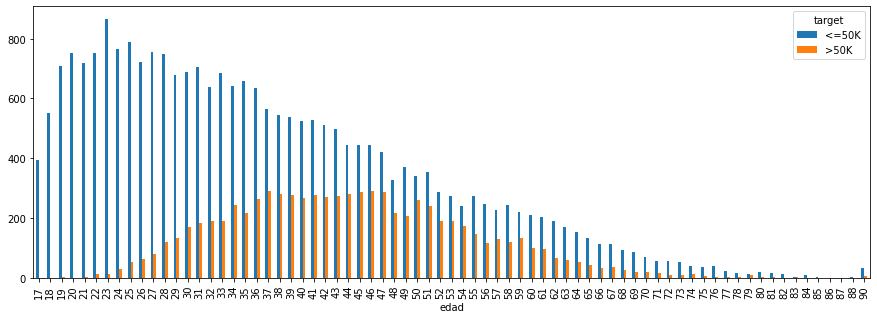

In [ ]:
print(dataset_v.target.value_counts())
draw_data = pd.crosstab(dataset['edad'], dataset['target'])
figure = draw_data.plot(kind='bar', stacked=False, grid=False, figsize=(15, 5),subplots=False,legend=True);

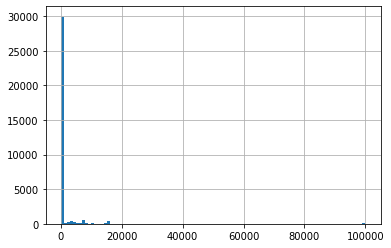

In [ ]:
dataset_v.loc[dataset_v['ganancia capital']>50000,'ganancia capital']#.hist(bins=100)
dataset_v['ganancia capital'].hist(bins=100)

<=50K    23974
>50K      7068
Name: target, dtype: int64


(32561, 10)

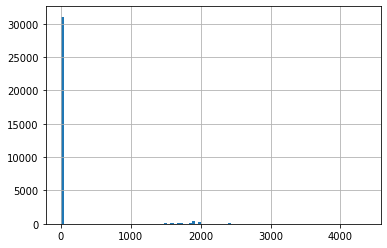

In [ ]:
dataset_v['perdida capital'].hist(bins=100)
print(dataset_v.loc[dataset_v['perdida capital']==0,'target'].value_counts())
dataset_v.shape

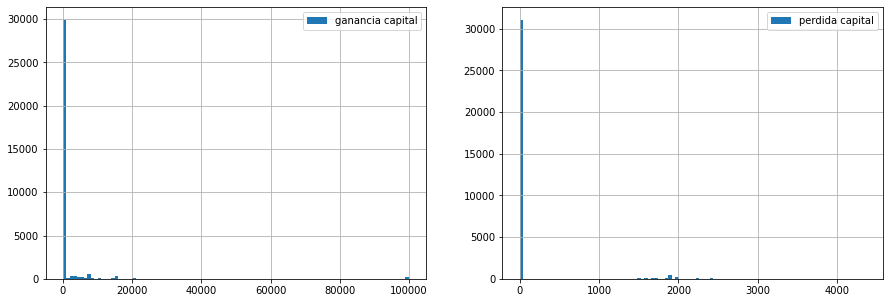

In [ ]:
plt.subplot(1,2,1)
#plt.hist(dataset_v.loc[dataset_v['ganancia capital']!=0,'ganancia capital'], bins=100, alpha=0.5, label='ganancia capital')
dataset_v['ganancia capital'].hist(bins=100,label='ganancia capital',figsize=(15, 5))
plt.legend(prop={'size': 10})
plt.subplot(1,2,2)
#plt.hist(dataset_v.loc[dataset_v['perdida capital']!=0,'perdida capital'], bins=100, alpha=0.5, label='perdida capital')
dataset_v['perdida capital'].hist(bins=100,label='perdida capital')
plt.legend(prop={'size': 10})
plt.savefig('figura_capital.jpg')
plt.show()

In [ ]:
dataset_v.loc[dataset_v.pais=='United-States'].shape
print(dataset_v.pais.nunique())
#print(dataset_v.pais.value_counts())


42


In [ ]:
dataset_v.head()

,edad,relacion,ocupacion,sexo,educacion,ganancia capital,perdida capital,horas por semana,pais,target
0,39,Not-in-family,Adm-clerical,Male,Bachelors,2174,0,40,United-States,<=50K
1,50,Husband,Exec-managerial,Male,Bachelors,0,0,13,United-States,<=50K
2,38,Not-in-family,Handlers-cleaners,Male,HS-grad,0,0,40,United-States,<=50K
3,53,Husband,Handlers-cleaners,Male,11th,0,0,40,United-States,<=50K
4,28,Wife,Prof-specialty,Female,Bachelors,0,0,40,Cuba,<=50K


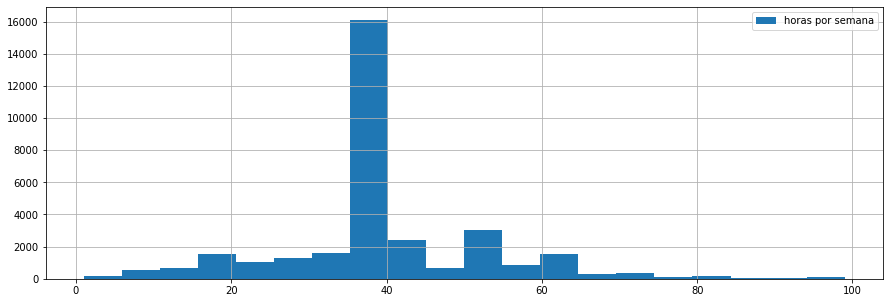

In [ ]:
dataset_v['horas por semana'].hist(bins=20,label='horas por semana',figsize=(15, 5))
plt.legend()
#print(dataset_v['horas por semana'].nunique())
#draw_data = pd.crosstab(dataset_v['horas por semana'], dataset_v['target'])
#figure = draw_data.plot(kind='bar', stacked=True, grid=False, figsize=(15, 5),subplots=False,legend=True);
plt.savefig('figura_horas.jpg')

In [ ]:
x = dataset_v.loc[dataset_v['target']=='<=50K','horas por semana']
y = dataset_v.loc[dataset_v['target']=='>50K','horas por semana']

In [ ]:
print(dataset_v.target[dataset_v.pais=='United-States'].value_counts())
print(dataset_v.target[dataset_v.pais!='United-States'].value_counts())
print(dataset_v.target[dataset_v.pais=='United-States'].shape)
print(dataset_v.target[dataset_v.pais!='United-States'].shape)

<=50K    21999
>50K      7171
Name: target, dtype: int64
<=50K    2721
>50K      670
Name: target, dtype: int64
(29170,)
(3391,)


In [ ]:
def pre_procesamiento(dataset):
  pre_procesado = dataset.copy()
  
  #target
  pre_procesado.loc[(pre_procesado.target != '>50K'),'target'] = 1
  pre_procesado.loc[(pre_procesado.target != '<=50K'),'target'] = 0

  #sexo
  pre_procesado = pd.get_dummies(pre_procesado, columns=['sexo'],drop_first=False)
  
  #horas por semana, perdida capital, ganancia capital
  #sin pre-procesado por ser variables numericas
  
  #pais
  pre_procesado.loc[(pre_procesado.pais == '?'),'pais'] = 'United-States'
  pre_procesado = pd.get_dummies(pre_procesado, columns=['pais'],drop_first=False)

  return pre_procesado


In [ ]:
pre_procesado = pre_procesamiento(dataset_v)
pre_procesado.head()

,edad,relacion,ocupacion,educacion,ganancia capital,perdida capital,horas por semana,target,sexo_Female,sexo_Male,pais_Cambodia,pais_Canada,pais_China,pais_Columbia,pais_Cuba,pais_Dominican-Republic,pais_Ecuador,pais_El-Salvador,pais_England,pais_France,pais_Germany,pais_Greece,pais_Guatemala,pais_Haiti,pais_Holand-Netherlands,pais_Honduras,pais_Hong,pais_Hungary,pais_India,pais_Iran,pais_Ireland,pais_Italy,pais_Jamaica,pais_Japan,pais_Laos,pais_Mexico,pais_Nicaragua,pais_Outlying-US(Guam-USVI-etc),pais_Peru,pais_Philippines,pais_Poland,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
0,39,Not-in-family,Adm-clerical,Bachelors,2174,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,Husband,Exec-managerial,Bachelors,0,0,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,Not-in-family,Handlers-cleaners,HS-grad,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,Husband,Handlers-cleaners,11th,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,Wife,Prof-specialty,Bachelors,0,0,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
